<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


- Visualize the distribution of data.

- Visualize the relationship between two features.

- Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [19]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


#### 2. Connect to the Database


**Install the needed libraries**


In [20]:
!pip install pandas


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
!pip install matplotlib


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('cleaned_survey_data.csv')

conn = sqlite3.connect('survey-results-public.sqlite')
df.to_sql('survey', conn, if_exists='replace', index=False)

# # Connect to the SQLite database



25746

## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [23]:
QUERY = "SELECT COUNT(*) FROM survey"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     25746


#### Demo 2: List All Tables


In [24]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,survey


#### Demo 3: Group Data by Age


In [25]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM survey 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old   3321
1     25-34 years old  11462
2     35-44 years old   7251
3     45-54 years old   2663
4     55-64 years old    869
5   65 years or older    106
6   Prefer not to say     34
7  Under 18 years old     40


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


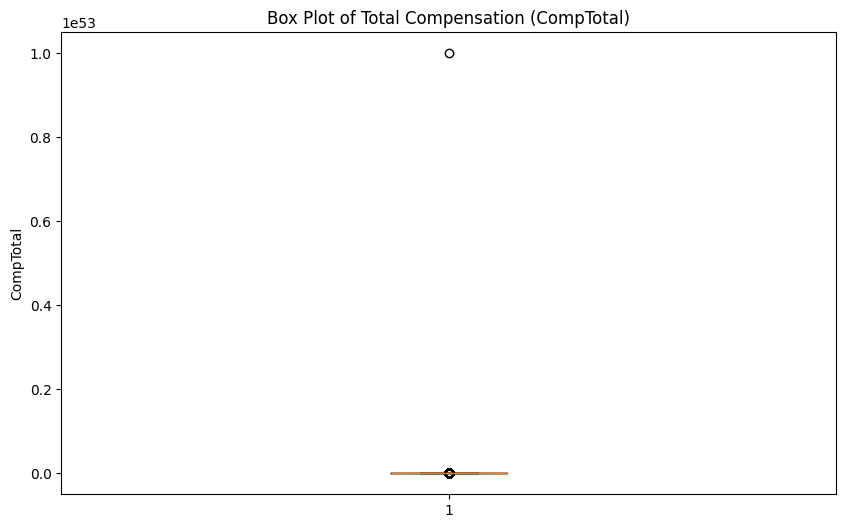

In [26]:
# your code goes here
QUERY = "SELECT CompTotal FROM survey where CompTotal is not null"
df_comp = pd.read_sql_query(QUERY, conn)
df_comp.head()

plt.figure(figsize=(10, 6))
plt.boxplot(df_comp['CompTotal'].dropna())
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.ylabel('CompTotal')
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


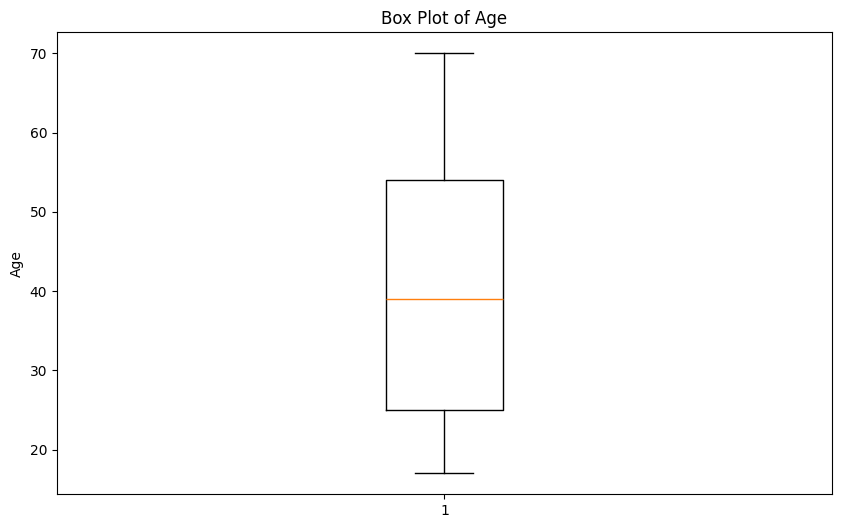

In [27]:
# your code goes here
# Convert Age column to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}

df_age['Age_numeric'] = df_age['Age'].map(age_mapping)

# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_age['Age_numeric'].dropna())
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 1200x800 with 0 Axes>

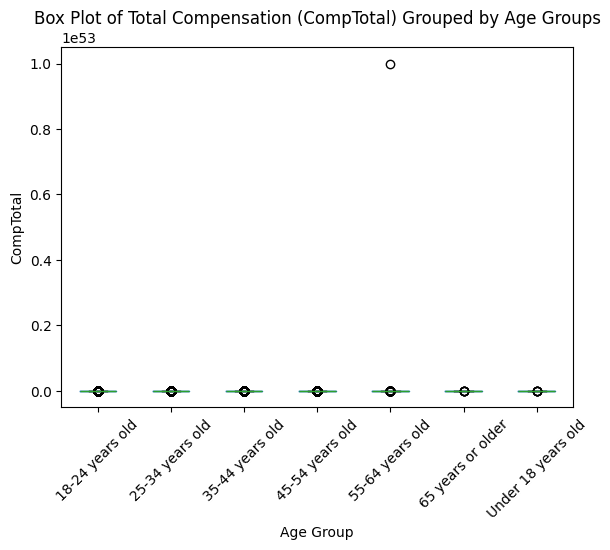

In [28]:
# your code goes here
QUERY = """
SELECT Age, CompTotal 
FROM survey 
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL
"""
df_age_comp = pd.read_sql_query(QUERY, conn)

# Map age groups to numeric values
df_age_comp['Age_numeric'] = df_age_comp['Age'].map(age_mapping)

# Drop rows with NaN values in Age_numeric
df_age_comp = df_age_comp.dropna(subset=['Age_numeric'])

# Plot the box plot
plt.figure(figsize=(12, 8))
df_age_comp.boxplot(column='CompTotal', by='Age', grid=False)
plt.title('Box Plot of Total Compensation (CompTotal) Grouped by Age Groups')
plt.suptitle('')
plt.xlabel('Age Group')
plt.ylabel('CompTotal')
plt.xticks(rotation=45)
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 1200x800 with 0 Axes>

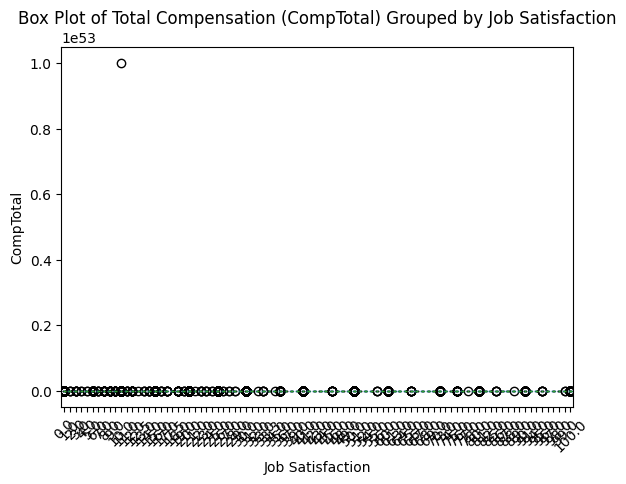

In [29]:
# your code goes here

QUERY = """
    SELECT JobSatPoints_6, CompTotal 
    FROM survey 
    WHERE CompTotal IS NOT NULL AND JobSatPoints_6 IS NOT NULL 
"""
df_job_sat_comp = pd.read_sql_query(QUERY, conn)

# Plot the box plot
plt.figure(figsize=(12, 8))
df_job_sat_comp.boxplot(column='CompTotal', by='JobSatPoints_6', grid=False)
plt.title('Box Plot of Total Compensation (CompTotal) Grouped by Job Satisfaction')
plt.suptitle('')
plt.xlabel('Job Satisfaction')
plt.ylabel('CompTotal')
plt.xticks(rotation=45)
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 2200x800 with 0 Axes>

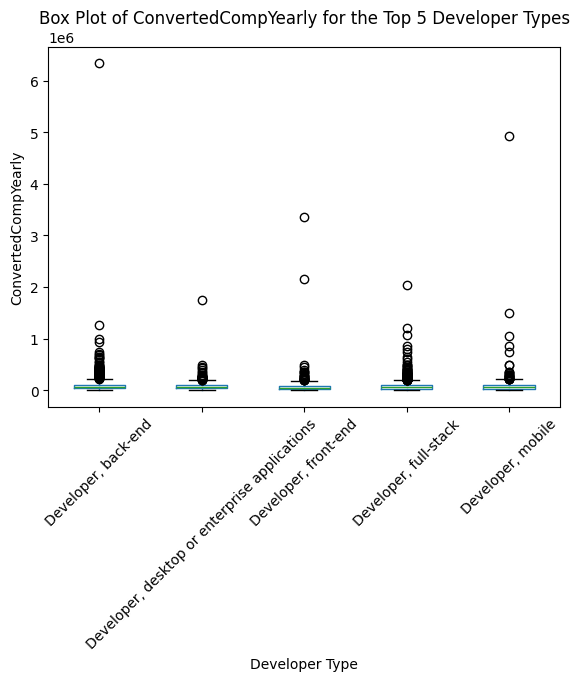

In [30]:
# your code goes here
QUERY = """
SELECT DevType, ConvertedCompYearly 
FROM survey 
WHERE ConvertedCompYearly IS NOT NULL AND DevType IS NOT NULL
"""
df_dev_comp = pd.read_sql_query(QUERY, conn)

# Split the DevType column into multiple rows
df_dev_comp = df_dev_comp.assign(DevType=df_dev_comp['DevType'].str.split(';')).explode('DevType')

# Get the top 5 developer types by count
top_5_dev_types = df_dev_comp['DevType'].value_counts().nlargest(5).index

# Filter the dataframe to include only the top 5 developer types
df_top_5_dev_comp = df_dev_comp[df_dev_comp['DevType'].isin(top_5_dev_types)]

# Plot the box plot
plt.figure(figsize=(22, 8))
df_top_5_dev_comp.boxplot(column='ConvertedCompYearly', by='DevType', grid=False)
plt.title('Box Plot of ConvertedCompYearly for the Top 5 Developer Types')
plt.suptitle('')
plt.xlabel('Developer Type')
plt.ylabel('ConvertedCompYearly')
plt.xticks(rotation=45)
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 2200x800 with 0 Axes>

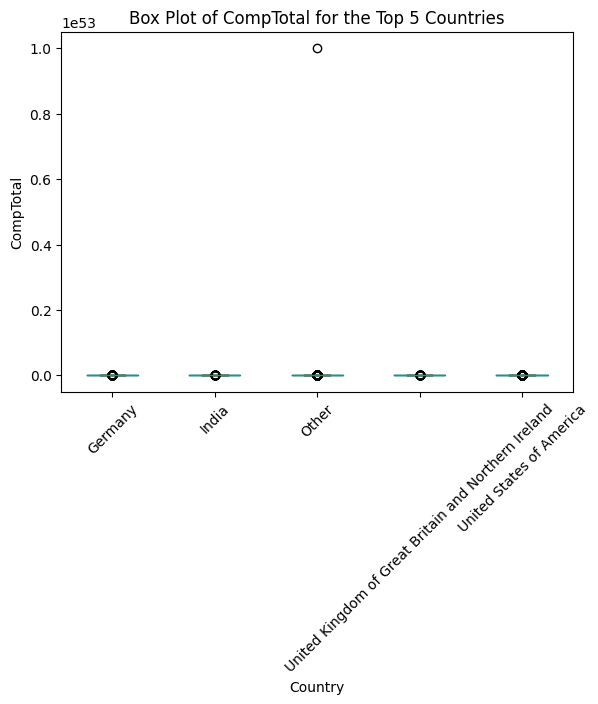

In [31]:
# your code goes here
QUERY = """
SELECT Country, CompTotal 
FROM survey 
WHERE CompTotal IS NOT NULL AND Country IS NOT NULL 
"""
df_country_comp = pd.read_sql_query(QUERY, conn)

# Get the top 5 countries by count
top_5_countries = df_country_comp['Country'].value_counts().nlargest(5).index

# Filter the dataframe to include only the top 5 countries
df_top_5_country_comp = df_country_comp[df_country_comp['Country'].isin(top_5_countries)]

# Plot the box plot
plt.figure(figsize=(22, 8))
df_top_5_country_comp.boxplot(column='CompTotal', by='Country', grid=False)
plt.title('Box Plot of CompTotal for the Top 5 Countries')
plt.suptitle('')
plt.xlabel('Country')
plt.ylabel('CompTotal')
plt.xticks(rotation=45)
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


<Figure size 1200x800 with 0 Axes>

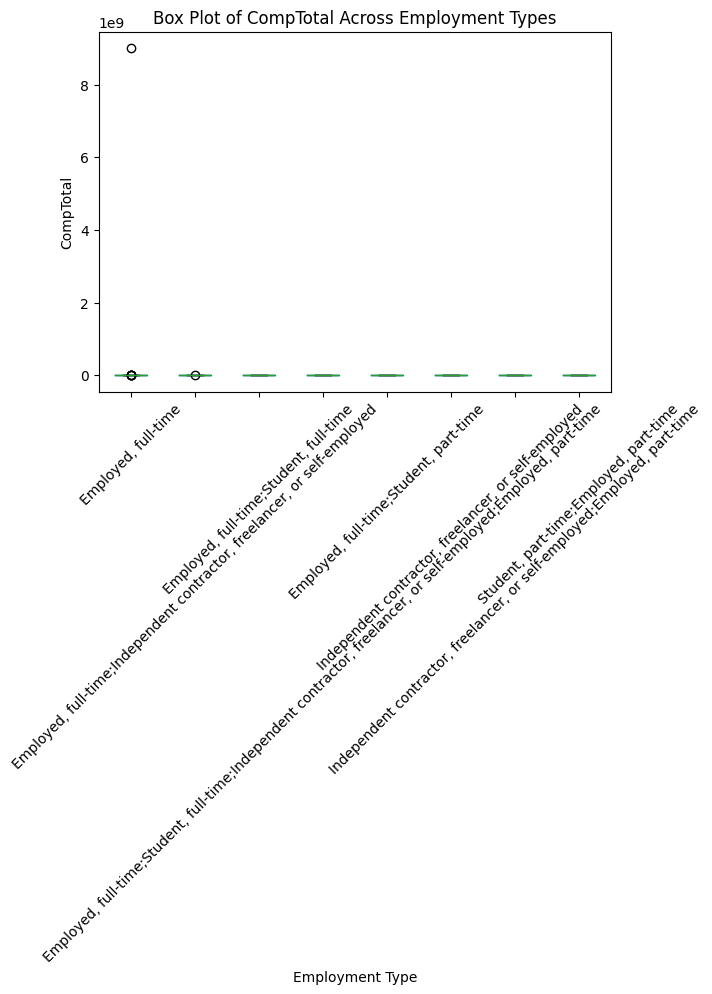

In [32]:
# your code goes here
QUERY = """
SELECT Employment, CompTotal 
FROM survey 
WHERE CompTotal IS NOT NULL AND Employment IS NOT NULL
"""
df_employment_comp = pd.read_sql_query(QUERY, conn).head(50)

employee = df_employment_comp['Employment'].value_counts().index
employee

#Plot the box plot
plt.figure(figsize=(12, 8))
df_employment_comp.boxplot(column='CompTotal', by='Employment', grid=False)
plt.title('Box Plot of CompTotal Across Employment Types')
plt.suptitle('')
plt.xlabel('Employment Type')
plt.ylabel('CompTotal')
plt.xticks(rotation=45)
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1200x800 with 0 Axes>

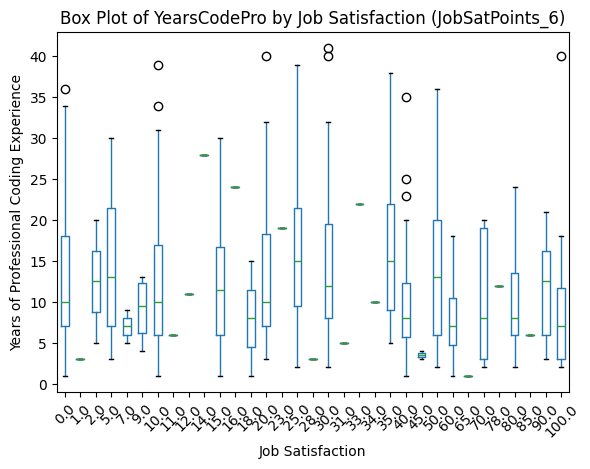

In [33]:
# your code goes here
QUERY = """
SELECT JobSatPoints_6, YearsCodePro 
FROM survey 
WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df_years_code_pro = pd.read_sql_query(QUERY, conn).head(500)

# Convert YearsCodePro to numeric values
df_years_code_pro['YearsCodePro'] = pd.to_numeric(df_years_code_pro['YearsCodePro'], errors='coerce')

# Plot the box plot
plt.figure(figsize=(12, 8))
df_years_code_pro.boxplot(column='YearsCodePro', by='JobSatPoints_6', grid=False)
plt.title('Box Plot of YearsCodePro by Job Satisfaction (JobSatPoints_6)')
plt.suptitle('')
plt.xlabel('Job Satisfaction')
plt.ylabel('Years of Professional Coding Experience')
plt.xticks(rotation=45)
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [34]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:

Ayushi Jain


### Other Contributors:

- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
